In [1]:
import pandas as pd
import numpy as np
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
from pmdarima import auto_arima

Data types in 'indu' dataframe:
Time     datetime64[ns]
Value           float64
dtype: object

Data types in 'cons' dataframe:
Time     datetime64[ns]
Value           float64
dtype: object

Data types in 'gdp' dataframe:
Time     datetime64[ns]
Value           float64
dtype: object


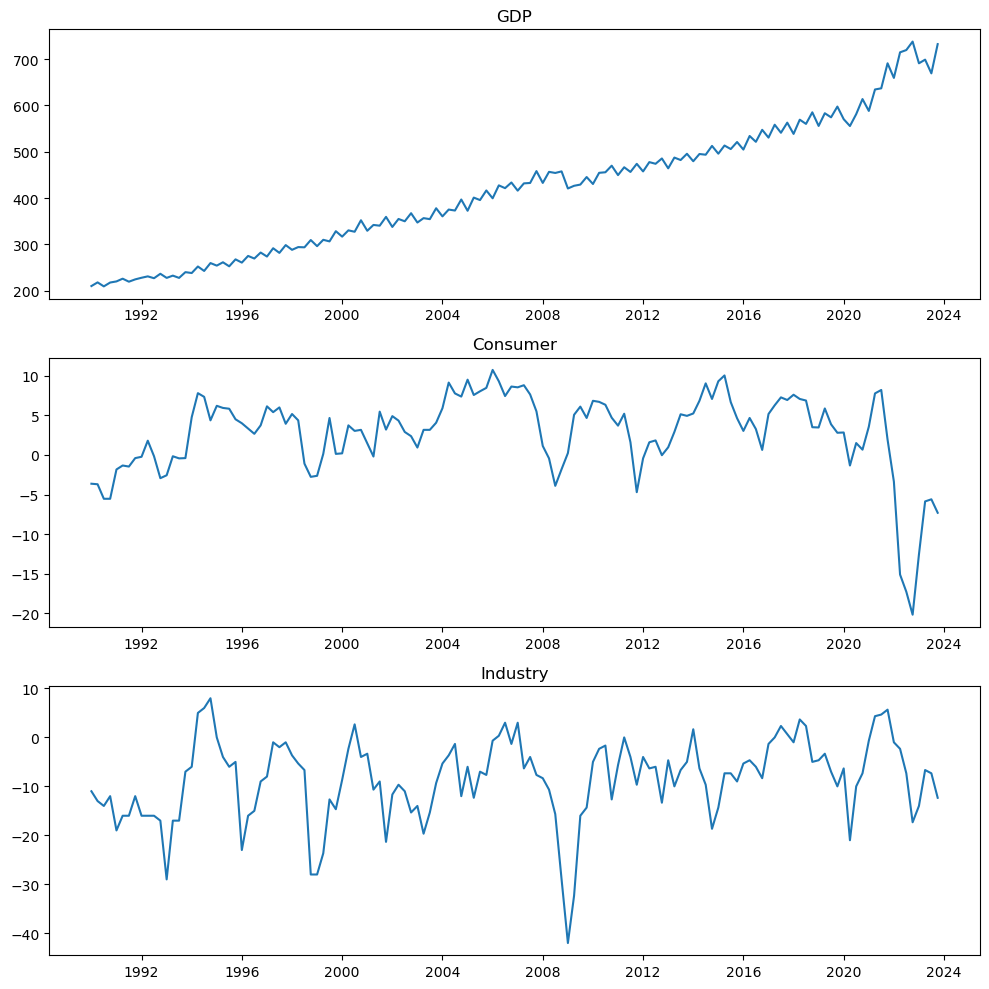

In [2]:
# Run the stored data from the Data_Preparation.ipynb
%run ..//Data_Preparation.ipynb

In [3]:
#Using the period 1990-2020 for training and 2021-2023 for testing
indu_train = indu[(indu['Time'] >= '1990-01-01') & (indu['Time'] < '2020-01-01')]
cons_train = cons[(cons['Time'] >= '1990-01-01') & (cons['Time'] < '2020-01-01')]
gdp_train = gdp[(gdp['Time'] >= '1990-01-01') & (gdp['Time'] < '2020-01-01')]

indu_test = indu[(indu['Time'] >= '2020-01-01') & (indu['Time'] < '2024-01-01')]
cons_test = cons[(cons['Time'] >= '2020-01-01') & (cons['Time'] < '2024-01-01')]
gdp_test = gdp[(gdp['Time'] >= '2020-01-01') & (gdp['Time'] < '2024-01-01')]

#Printing the length of the training and testing data
print("indu lenght: ", len(indu_train), " cons lenght: ", len(cons_train)," gdp lenght: ", len(gdp_train))
print("indu lenght: ", len(indu_test), " cons lenght: ", len(cons_test)," gdp lenght: ", len(gdp_test))

indu lenght:  120  cons lenght:  120  gdp lenght:  120
indu lenght:  16  cons lenght:  16  gdp lenght:  16


In [4]:
print(gdp_train)
print(cons_train)
print(indu_train)


          Time  Value
0   1990-01-01  210.2
1   1990-04-01  218.1
2   1990-07-01  209.5
3   1990-10-01  217.8
4   1991-01-01  220.2
..         ...    ...
115 2018-10-01  585.2
116 2019-01-01  555.8
117 2019-04-01  583.2
118 2019-07-01  574.4
119 2019-10-01  597.6

[120 rows x 2 columns]
        Value       Time
0   -3.633333 1990-01-01
1   -3.700000 1990-04-01
2   -5.533333 1990-07-01
3   -5.533333 1990-10-01
4   -1.833333 1991-01-01
..        ...        ...
115  3.500000 2018-10-01
116  3.466667 2019-01-01
117  5.866667 2019-04-01
118  3.866667 2019-07-01
119  2.800000 2019-10-01

[120 rows x 2 columns]
         Value       Time
0   -11.000000 1990-01-01
1   -13.000000 1990-04-01
2   -14.000000 1990-07-01
3   -12.000000 1990-10-01
4   -19.000000 1991-01-01
..         ...        ...
115  -5.000000 2018-10-01
116  -4.666667 2019-01-01
117  -3.333333 2019-04-01
118  -7.000000 2019-07-01
119 -10.000000 2019-10-01

[120 rows x 2 columns]


In [5]:
#Resetting the index
gdp_train.reset_index(drop=True, inplace=True)
indu_train.reset_index(drop=True, inplace=True)
cons_train.reset_index(drop=True, inplace=True)

# Combine the explanatory variables into a single DataFrame
exog = pd.concat([indu_train, cons_train], axis=1)

#Remove the Time column
exog.drop('Time', axis=1, inplace=True)

#Fit auto_arima function to the data
arimax_model = auto_arima(gdp_train['Value'], exogenous=exog, 
                          start_p=1, start_q=1,
                          max_p=3, max_q=3, 
                          m=4, seasonal=True,
                          trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

# Print the summary of the model
arimax_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[4] intercept   : AIC=734.437, Time=0.17 sec
 ARIMA(0,0,0)(0,1,0)[4] intercept   : AIC=847.250, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[4] intercept   : AIC=734.631, Time=0.09 sec
 ARIMA(0,0,1)(0,1,1)[4] intercept   : AIC=774.525, Time=0.06 sec
 ARIMA(0,0,0)(0,1,0)[4]             : AIC=967.659, Time=0.01 sec
 ARIMA(1,0,1)(0,1,1)[4] intercept   : AIC=732.869, Time=0.08 sec
 ARIMA(1,0,1)(0,1,0)[4] intercept   : AIC=756.107, Time=0.05 sec
 ARIMA(1,0,1)(0,1,2)[4] intercept   : AIC=734.499, Time=0.14 sec
 ARIMA(1,0,1)(1,1,0)[4] intercept   : AIC=736.239, Time=0.11 sec
 ARIMA(1,0,1)(1,1,2)[4] intercept   : AIC=736.019, Time=0.38 sec
 ARIMA(1,0,0)(0,1,1)[4] intercept   : AIC=731.213, Time=0.07 sec
 ARIMA(1,0,0)(0,1,0)[4] intercept   : AIC=760.386, Time=0.03 sec
 ARIMA(1,0,0)(1,1,1)[4] intercept   : AIC=732.628, Time=0.13 sec
 ARIMA(1,0,0)(0,1,2)[4] intercept   : AIC=732.722, Time=0.09 sec
 ARIMA(1,0,0)(1,1,2)[4] intercept   : AIC=inf, 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  120
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 4)   Log Likelihood                -361.607
Date:                             Tue, 09 Apr 2024   AIC                            731.213
Time:                                     12:55:37   BIC                            742.228
Sample:                                          0   HQIC                           735.685
                                             - 120                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.3145      0.673      3.438      0.001       0.995       3.634
ar.L1          0.8159      0.050     16.197      0.000       0.717       0.915
ma.S.L4       -0.5412      0.083     -6.493      0.000      -0.705      -0.378
sigma2        29.3720      3.375      8.702      0.000      22.756      35.988
===================================================================================
Ljung-Box (L1) (Q):                   0.36   Jarque-Bera (JB):                17.04
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):               1.27   Skew:                            -0.53
Prob(H) (two-sided):                  0.46   Kurtosis:                         4.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

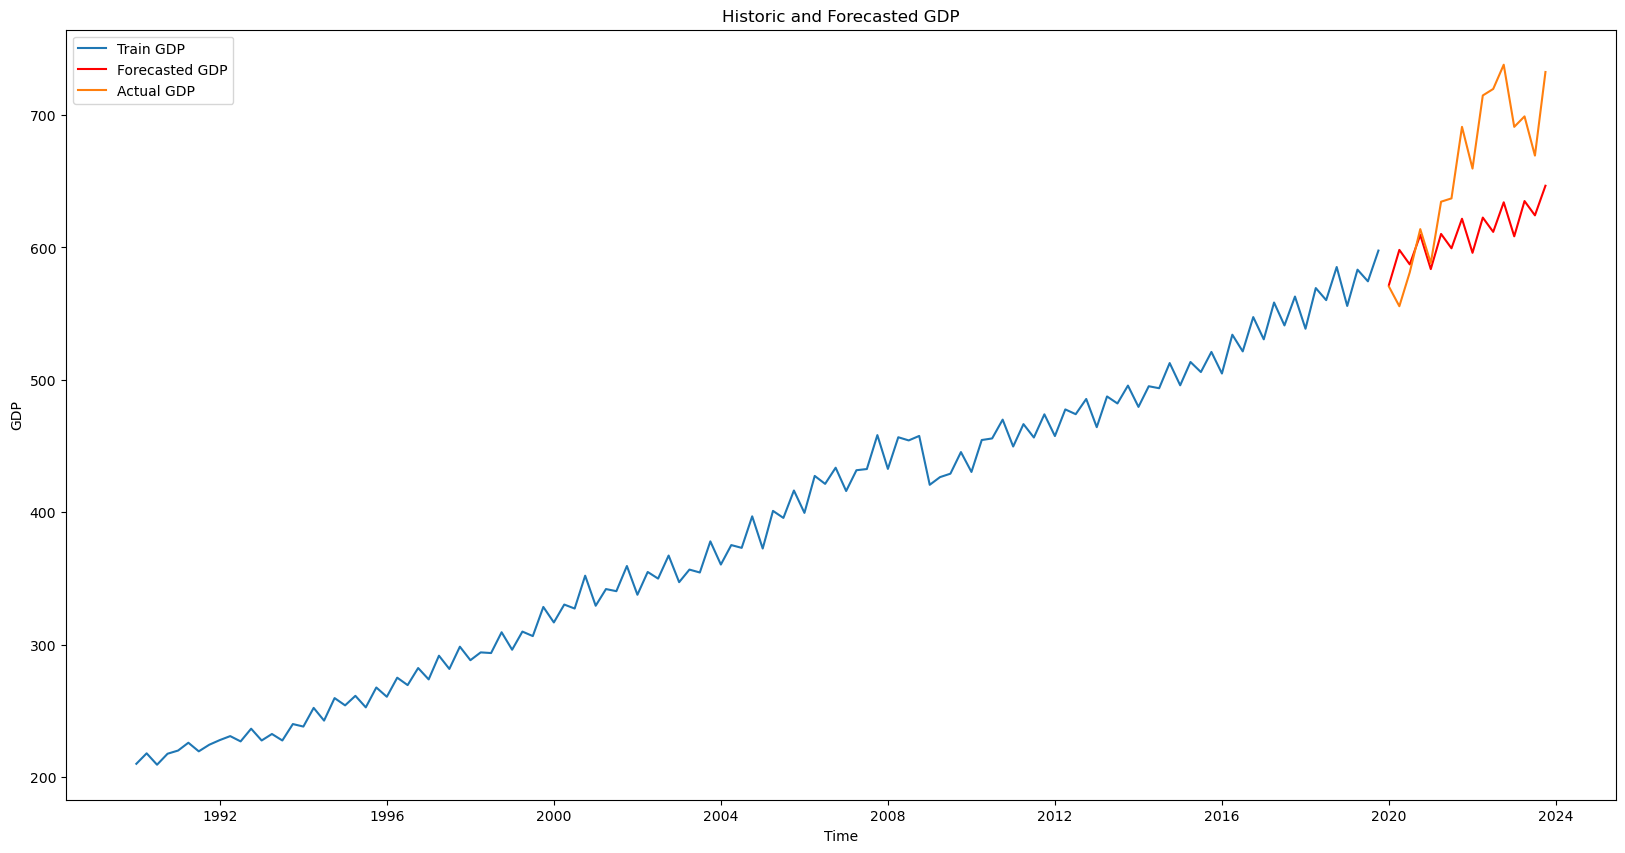

In [6]:
# Forecast 16 quarters ahead based on test indu and cons
exog_test = pd.concat([indu_test, cons_test], axis=1)

# Remove the Time column
exog_test.drop('Time', axis=1, inplace=True)

# Forecast the GDP values
forecast = arimax_model.predict(n_periods=16, exogenous=exog_test)

# Get the forecasted values
forecast_values = forecast.tolist()

# Plotting historic GDP and forecasted GDP
plt.figure(figsize=(20,10))
plt.plot(gdp_train['Time'], gdp_train['Value'], label='Train GDP')
plt.plot(gdp_test['Time'], forecast_values, color='red', label='Forecasted GDP')
plt.plot(gdp_test['Time'], gdp_test['Value'], label='Actual GDP')

# Set the title and labels
plt.title('Historic and Forecasted GDP')
plt.xlabel('Time')
plt.ylabel('GDP')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [7]:
#Comparing the forecasted values with the actual values trough RMSE and MAPE
# Calculate the RMSE
rmse_value = rmse(gdp_test['Value'], forecast_values)
#Calculate the MAPE
mape_value = mean_absolute_percentage_error(gdp_test['Value'], forecast_values) * 100 #Multiplying by 100 to get the percentage

# Print the RMSE
print("The RMSE is", rmse_value)
# Print the MAPE
print("The MAPE is", mape_value)

#The RMSE is 63, which is quite high. This is likely due to the fact that the model is not very good at predicting the GDP in the period 2020 - 2023. This is likely due to the COVID-19 pandemic, which has caused a lot of uncertainty in the economy. The model is not able to capture this uncertainty, and therefore the forecast is not very accurate.
#The MAPE is 7,6%.

The RMSE is 63.24256676150467
The MAPE is 7.584910684157757
